In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from re import X
import pandas as pd

xData = pd.read_csv("/content/drive/MyDrive/norm540.txt", delimiter='\t',header=None).iloc[:,3:22]
yData = pd.read_excel("/content/drive/MyDrive/aggregateRockData-1.xlsx",header=None)
col_nms = ['feature-{}'.format(i) for i in range(1, 20)]
xData.columns = col_nms


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
yData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,2,57,19,6,46,36,0.695122,0.231707,0.073171,0.560976
1,2,1,1,2,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683
2,3,1,1,3,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902
3,4,1,1,4,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659
4,5,1,1,5,3,42,6,34,25,57,0.512195,0.073171,0.414634,0.304878


In [5]:
labels = list(yData[1])
label_df = pd.DataFrame(labels, columns=['rockCatNumber'])
label_df.name="classes"
label_df.head()

,rockCatNumber
0,1
1,1
2,1
3,1
4,1


In [6]:
xData.head()

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19
0,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,-0.352386,-0.260224,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
1,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
2,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
3,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
4,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419


In [7]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rockCatNumber  540 non-null    int64
dtypes: int64(1)
memory usage: 4.3 KB


In [8]:
xData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature-1   540 non-null    float64
 1   feature-2   540 non-null    float64
 2   feature-3   540 non-null    float64
 3   feature-4   540 non-null    float64
 4   feature-5   540 non-null    float64
 5   feature-6   540 non-null    float64
 6   feature-7   540 non-null    float64
 7   feature-8   540 non-null    float64
 8   feature-9   540 non-null    float64
 9   feature-10  540 non-null    float64
 10  feature-11  540 non-null    float64
 11  feature-12  540 non-null    float64
 12  feature-13  540 non-null    float64
 13  feature-14  540 non-null    float64
 14  feature-15  540 non-null    float64
 15  feature-16  540 non-null    float64
 16  feature-17  540 non-null    float64
 17  feature-18  540 non-null    float64
 18  feature-19  540 non-null    float64
dtypes: float64(19)
memory usage: 

The dataset comprises 540 records, with each record containing 19 features and a single label column. The dataset is fully populated, meaning there are no missing values in any feature across the records. All features are represented as float64 values, while the label is an int64 value.

In [9]:
label_df.value_counts()

rockCatNumber
1                180
2                180
3                180
dtype: int64

:From seeing in labels, we can see that there are only 3 possible classes, and each class has 180 records.


###1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Finding statistical values by using describe()

In [10]:
xData.describe()

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19
count,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02
mean,-1.851852e-09,9.629630e-08,5.370370e-08,-6.296296e-08,-4.074074e-08,-1.537037e-07,-1.666667e-08,-1.814815e-07,-1.481481e-08,-1.166667e-07,-1.629630e-07,1.703704e-07,-6.851852e-08,-5.555556e-09,3.388889e-07,1.203704e-07,-1.148148e-07,-1.759259e-07,3.018519e-07
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01
min,-1.321491e+00,-4.076230e-01,-1.187950e+00,-1.322715e+00,-1.248012e+00,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
25%,-8.236470e-01,-4.076230e-01,-7.615050e-01,-8.046310e-01,-6.991450e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
50%,-3.009100e-01,-4.076230e-01,-3.751970e-01,-1.829290e-01,-2.715380e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-2.991730e-01,-5.121600e-01,-5.406530e-01,-2.490840e-01,-2.279220e-01,-2.250450e-01,-4.011240e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
75%,7.644770e-01,-1.596880e-01,5.843033e-01,5.769290e-01,3.571070e-01,-1.820210e-01,-1.450180e-01,-3.523860e-01,-2.602240e-01,3.907600e-01,-1.384200e-02,-1.658870e-01,3.487180e-01,-2.279220e-01,-2.250450e-01,1.685000e-01,1.042300e-02,-2.072980e-01,-3.104190e-01
max,2.422299e+00,4.551072e+00,2.750390e+00,4.175892e+00,3.813059e+00,4.643652e+00,4.798130e+00,4.888957e+00,5.862693e+00,3.610446e+00,8.457556e+00,3.207009e+00,4.832237e+00,7.120010e+00,7.986072e+00,5.010309e+00,3.137369e+00,3.629722e+00,5.216791e+00


The output of the describe() function provides statistics such as mean, standard deviation, quartiles (q1, q2, q3), minimum, and maximum values for each attribute in the dataset. Visualizing this data as histograms allows us to gain a better understanding of the distribution of values. While histograms are less informative for the label column (yData) due to its limited number of possible values, they are particularly useful for exploring the distribution of the feature set (xData). Notably, the standard deviation of each attribute is approximately equal to or less than 1.

Plotting the histogram of all the attributes


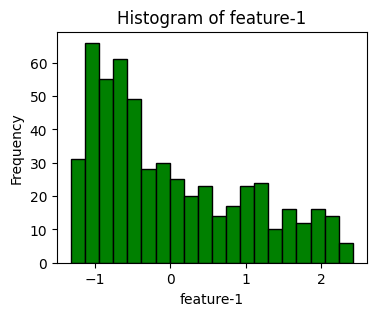

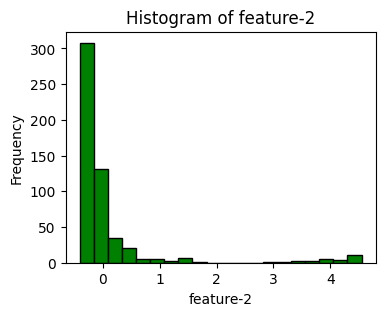

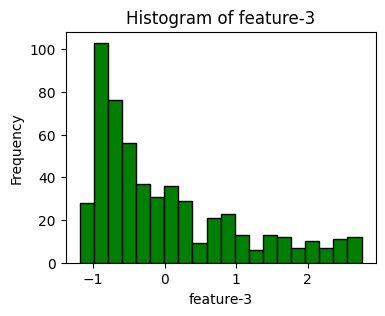

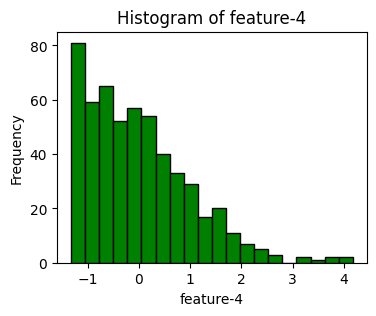

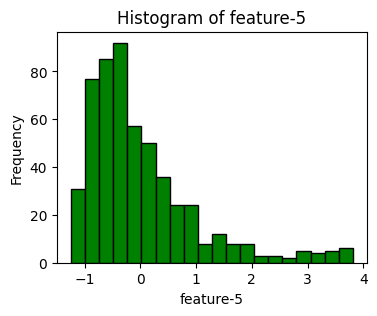

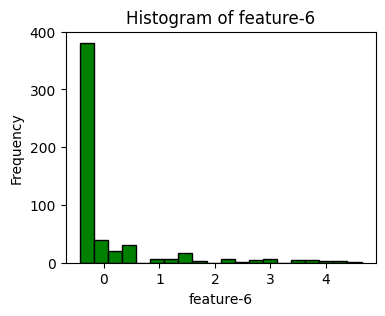

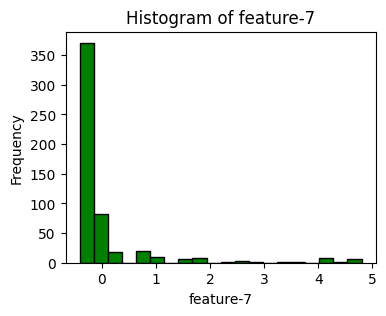

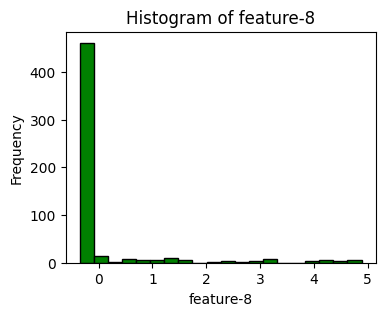

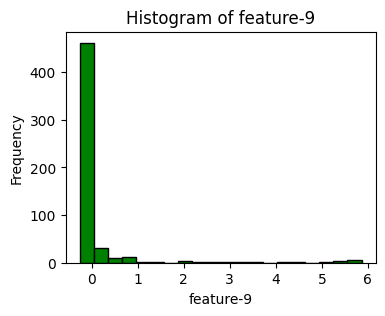

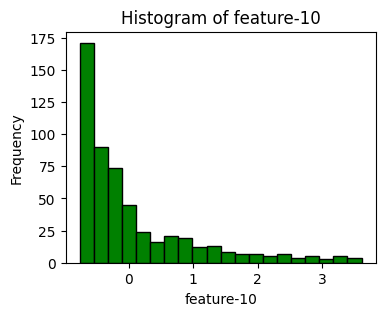

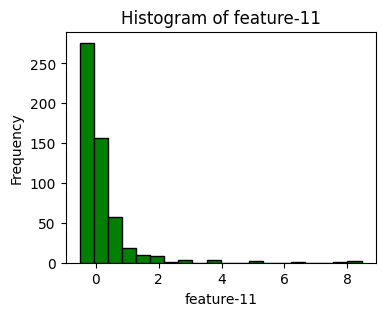

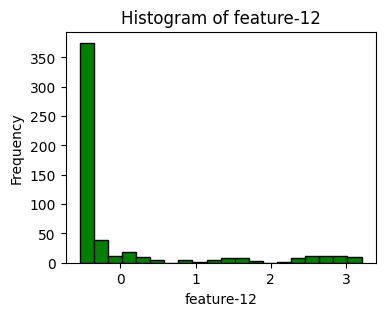

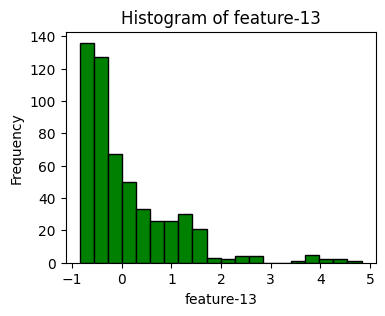

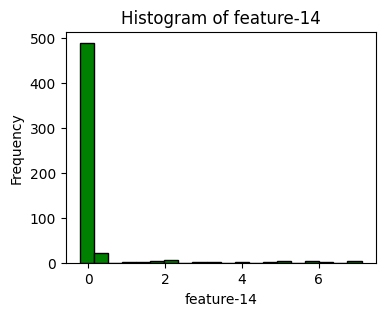

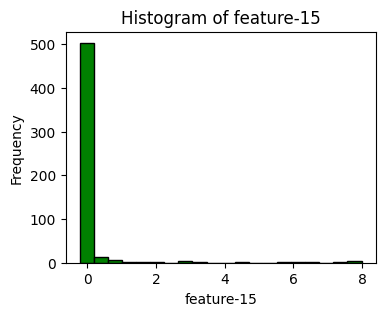

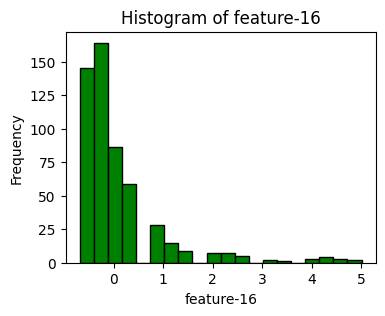

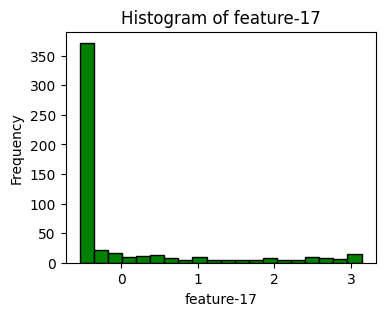

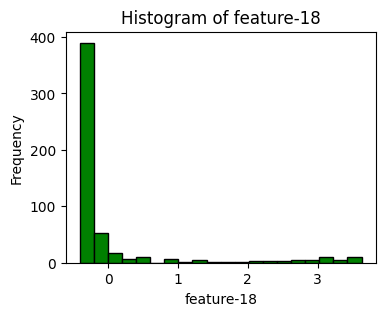

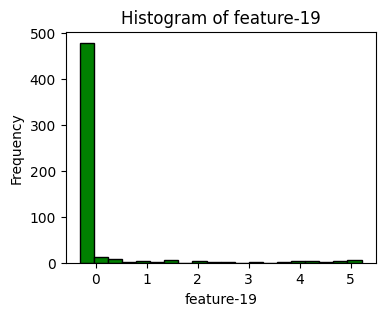

In [11]:
import matplotlib.pyplot as plt

for clmn in xData.columns:
    plt.figure(figsize=(4, 3))
    xData[clmn].hist(bins=20, color='green', edgecolor='black')
    plt.title('Histogram of {}'.format(clmn))
    plt.xlabel(clmn)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [12]:
skness = xData.skew()
print("Skewness of all attributes:")
print(skness)



Skewness of all attributes:
feature-1     0.714977
feature-2     3.620303
feature-3     1.097902
feature-4     1.039908
feature-5     1.715341
feature-6     2.813088
feature-7     3.380080
feature-8     3.384711
feature-9     4.753846
feature-10    1.739787
feature-11    4.845069
feature-12    2.003191
feature-13    1.944237
feature-14    5.221579
feature-15    6.373542
feature-16    2.786519
feature-17    1.918221
feature-18    2.632849
feature-19    3.911822
dtype: float64


The histograms demonstrate distinct distributions for each attribute, with varying degrees of spread across them. Notably, all histograms exhibit rightward skewness, suggesting asymmetry in the data distribution. Addressing this skewness requires adjusting the data to achieve better balance. Potential approaches include transforming the values by taking logarithms or grouping them into bins. These adjustments aim to enhance the accuracy of our analysis and modeling processes.






###2. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.


Finding the Pearson correlation coefficient between the data attributes and label

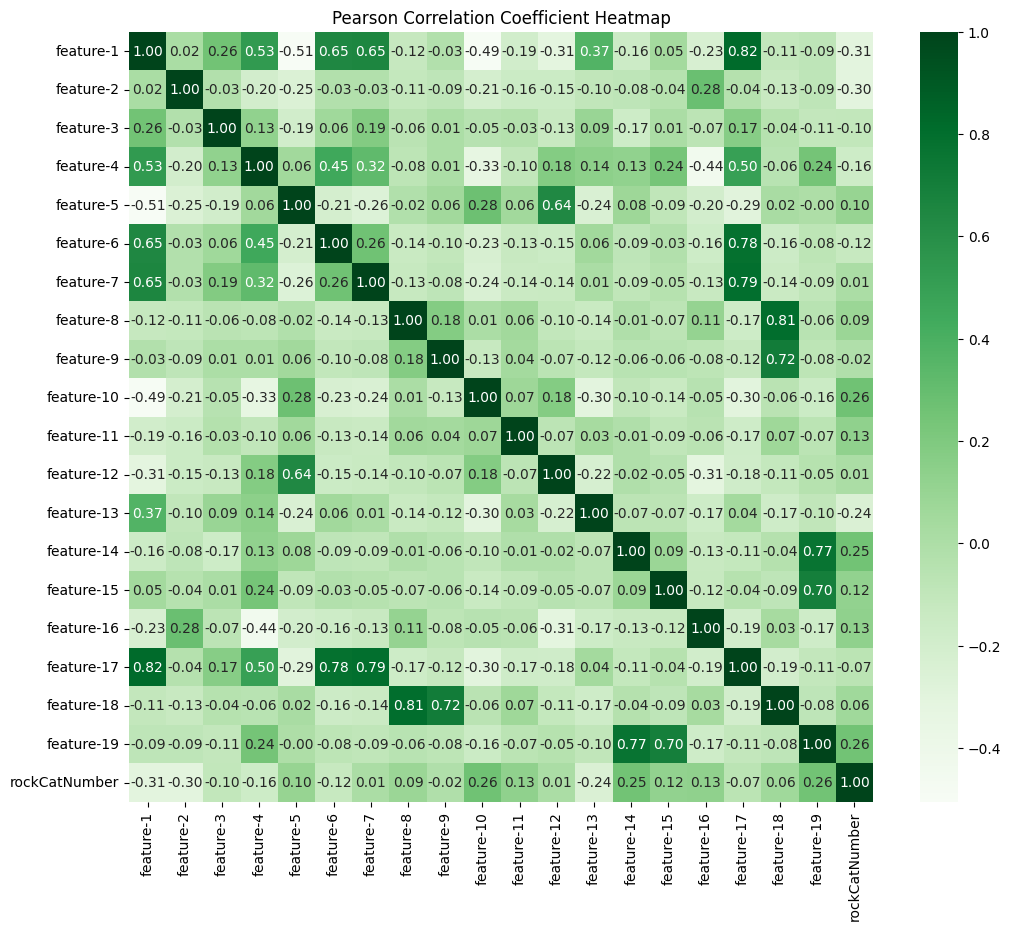

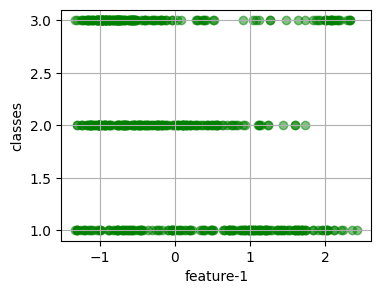

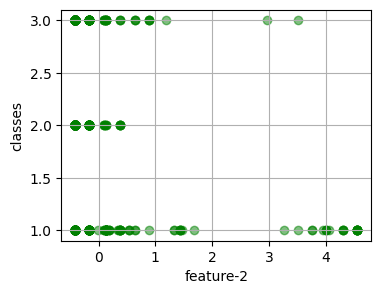

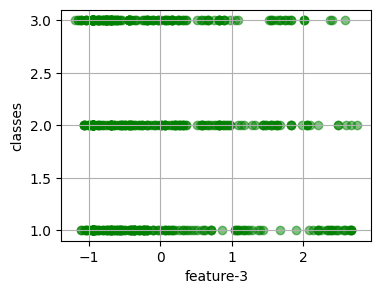

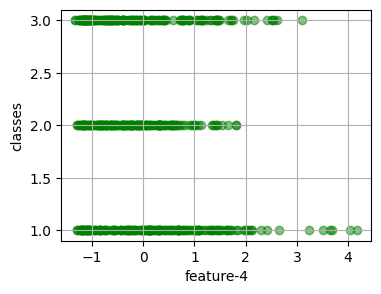

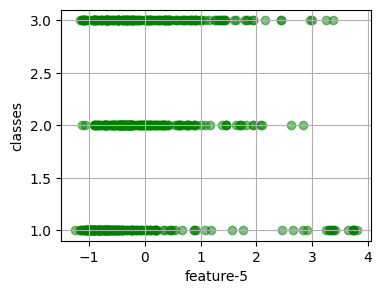

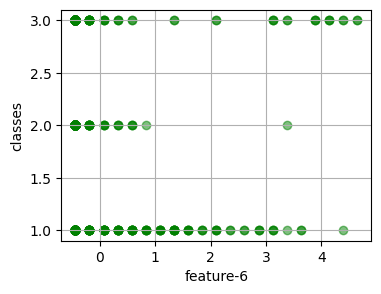

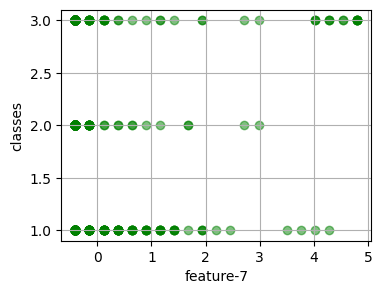

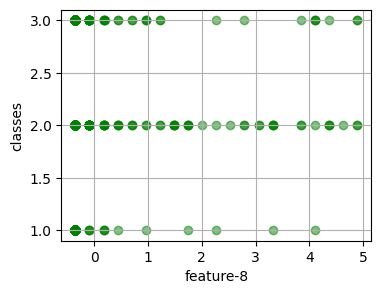

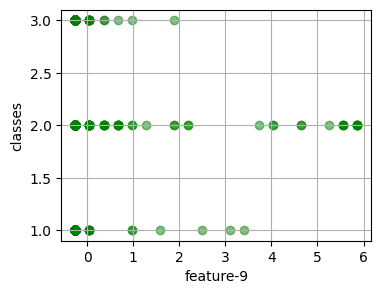

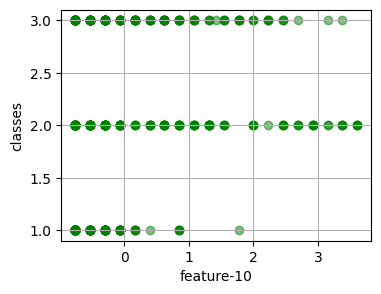

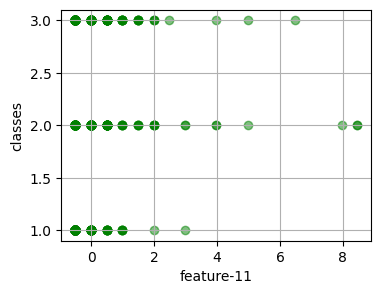

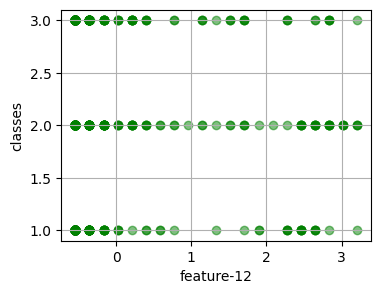

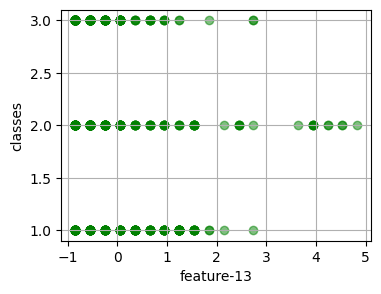

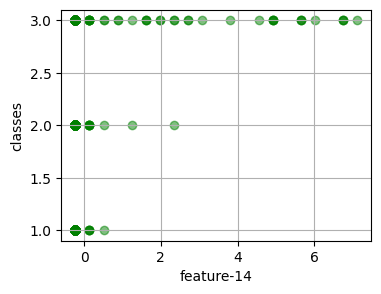

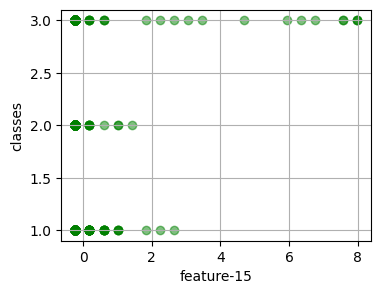

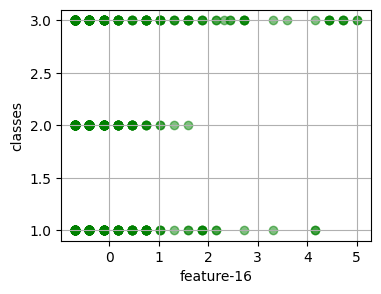

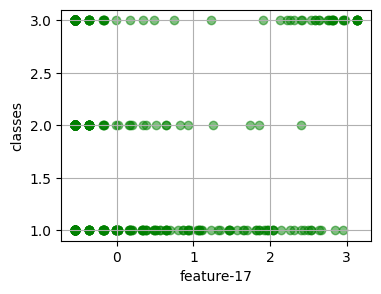

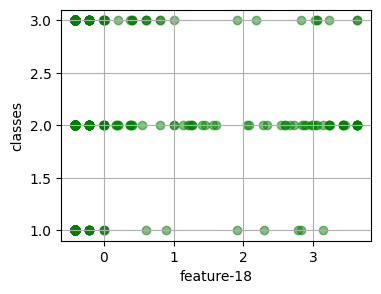

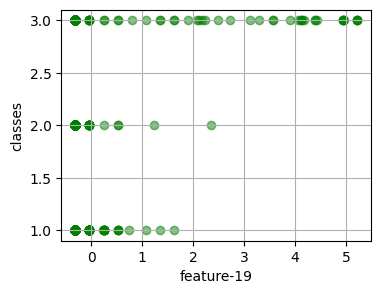

In [13]:
import seaborn as sns
mergData = pd.concat([xData, label_df], axis=1)

corrMatrix = mergData.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

for clmn in xData.columns:
    plt.figure(figsize=(4, 3))
    plt.scatter(xData[clmn], label_df, color='green', alpha=0.5)
    plt.xlabel(clmn)
    plt.ylabel(label_df.name)
    plt.grid(True)
    plt.show()


The correlation between most features appears to be relatively low, with the lowest correlations observed for feature-18, feature-17, feature-12, feature-9, feature-8, and feature-7.

Generating the scatter plots between promising attributes(from previous corrMatrix) to other and label

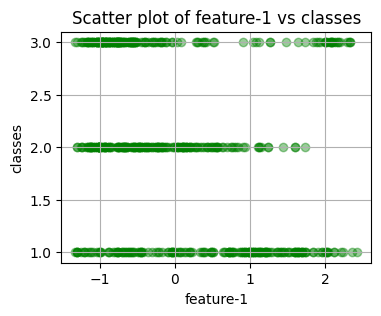

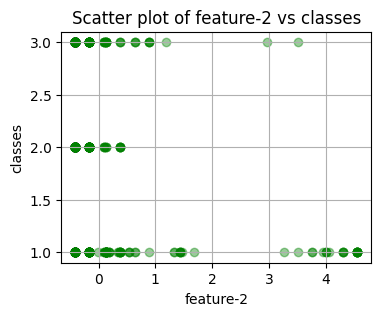

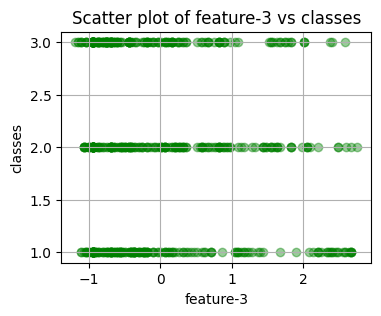

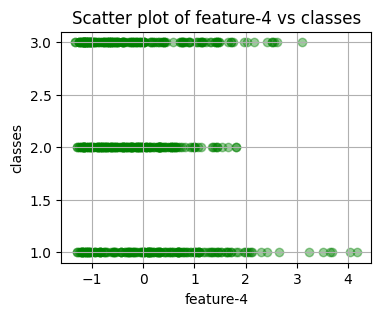

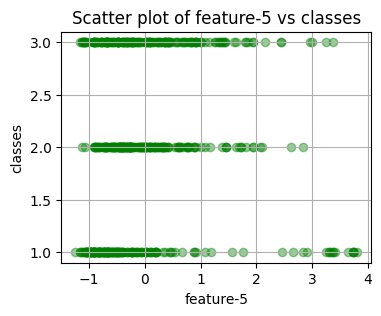

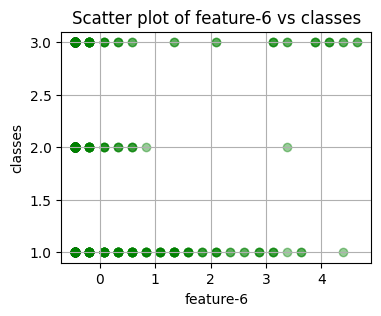

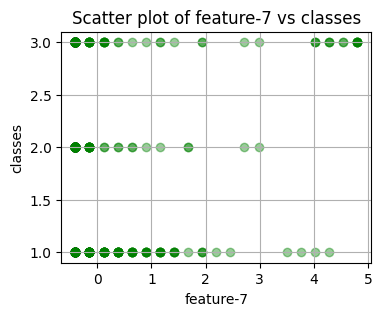

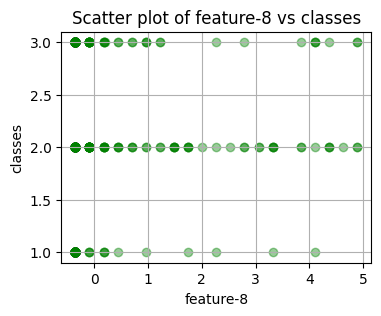

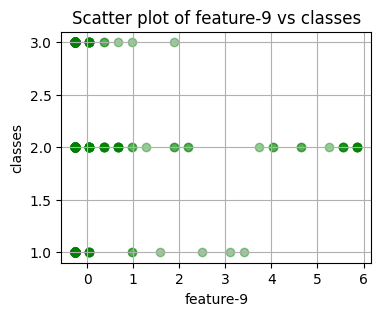

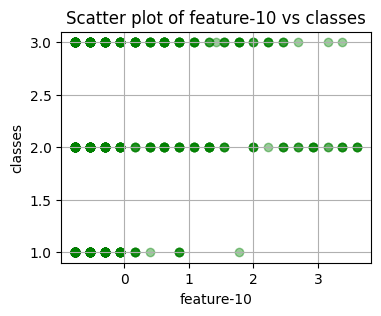

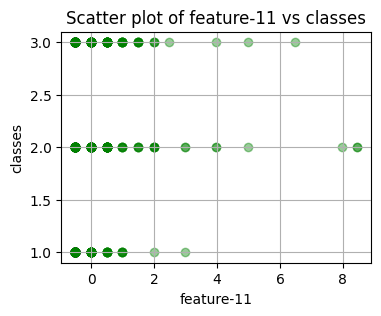

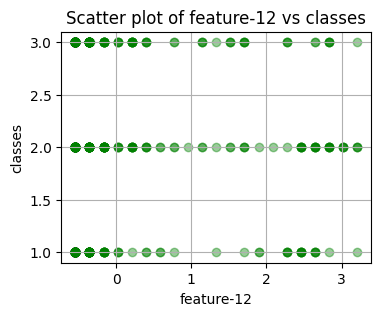

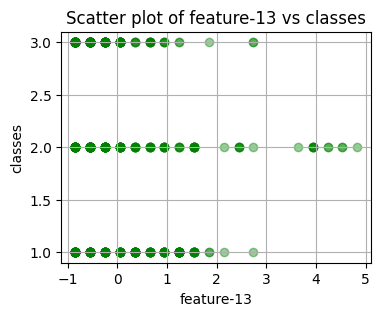

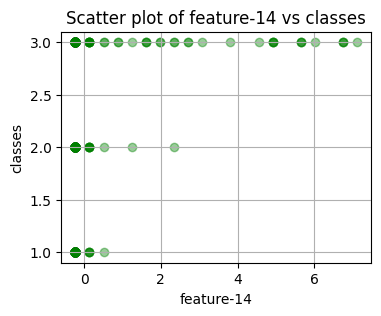

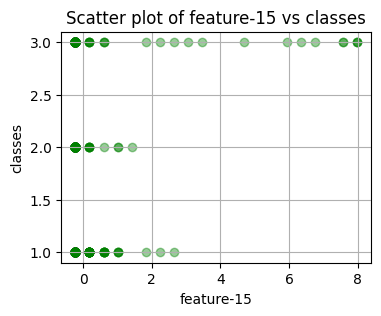

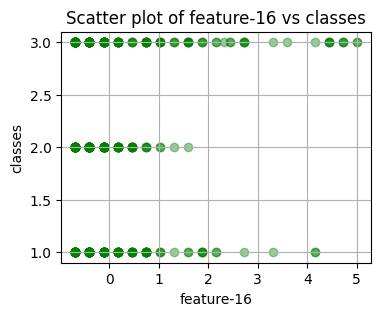

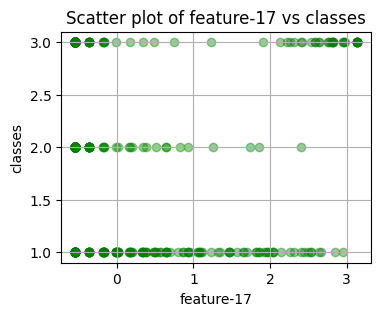

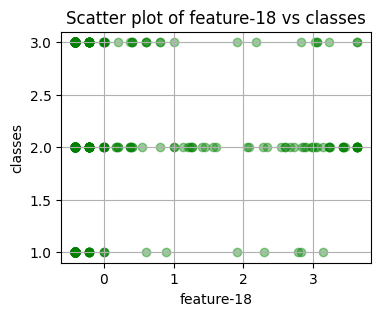

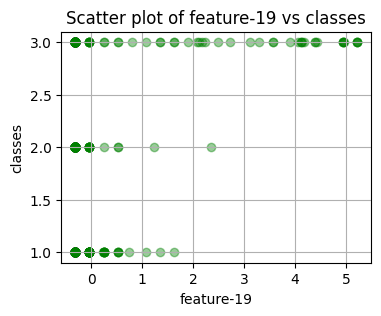

In [14]:
# Define selected features
selectedFeats = [feature for feature in xData.columns ]

# Plot scatter plots between selected features and label
for attr in selectedFeats:
    plt.figure(figsize=(4, 3))
    plt.scatter(xData[attr], label_df, color='green', alpha=0.4)
    plt.title('Scatter plot of {} vs {}'.format(attr, label_df.name))
    plt.xlabel(attr)
    plt.ylabel(label_df.name)
    plt.grid(True)
    plt.show()

    # Plot scatter plots between selected features and other attributes
    other_attrs = [clmn for clmn in xData.columns if clmn not in selectedFeats]
    for other_attr in other_attrs:
        plt.figure(figsize=(4, 3))
        plt.scatter(xData[attr], xData[other_attr], color='red', alpha=0.4)
        plt.title('Scatter plot of {} vs {}'.format(attr, other_attr))
        plt.xlabel(attr)
        plt.ylabel(other_attr)
        plt.grid(True)
        plt.show()

Given the abundance of features (12) and a single label, generating a scatter matrix depicting all 13 features on each axis could be overwhelming and challenging to interpret. To simplify interpretation, we will create individual graphs mapping each selected feature against the label.

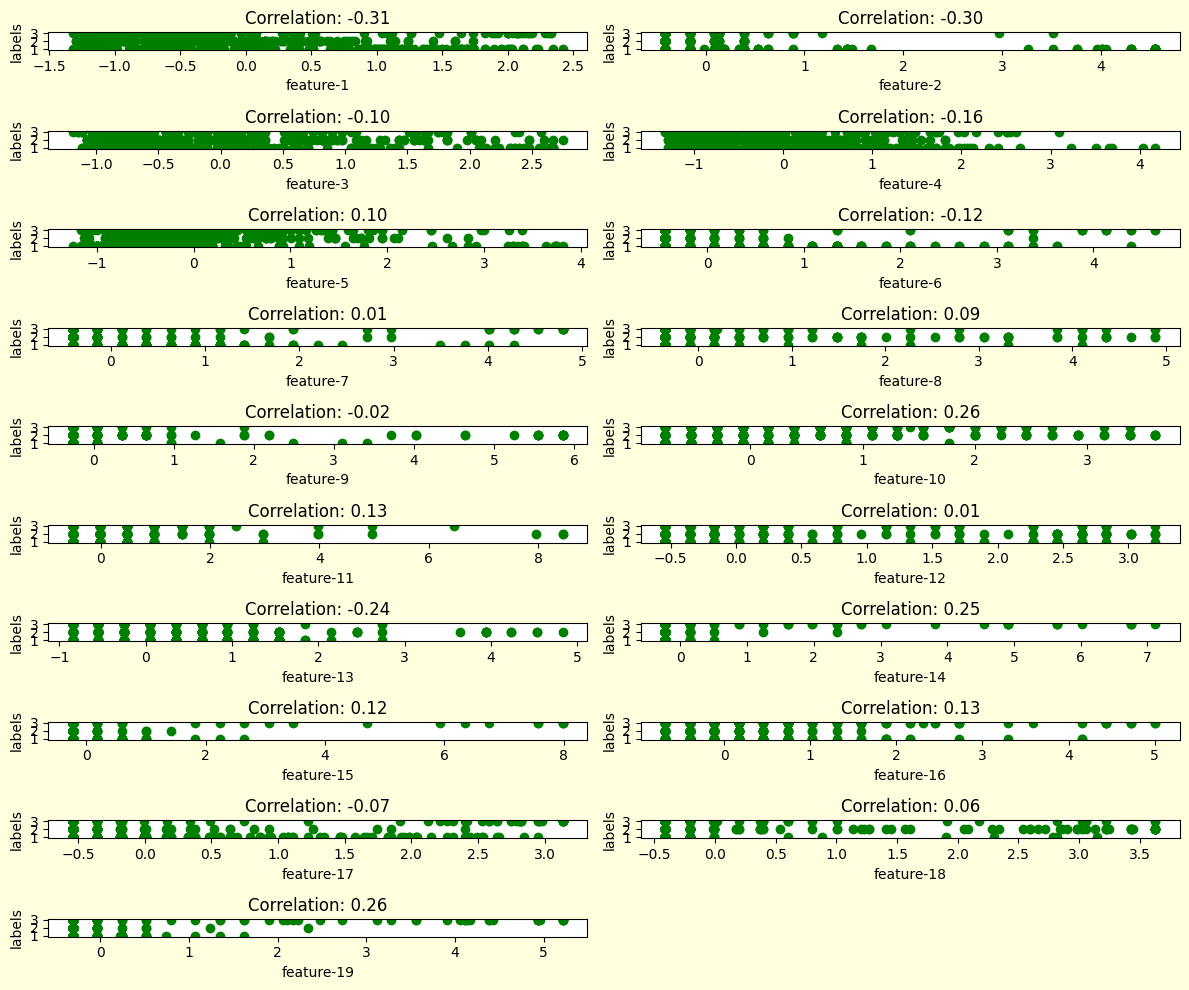

In [15]:
# Create a grid of subplots
numPlots = len(selectedFeats)
numCols = 2  # Number of columns in the grid
numRows = (numPlots + 1) // numCols  # Calculate the number of rows

figu, axs = plt.subplots(numRows, numCols, figsize=(12, 10), facecolor='lightyellow')

for i, feat in enumerate(selectedFeats):
    row = i // numCols
    clmn = i % numCols
    axx = axs[row, clmn]

    axx.scatter(mergData[feat], mergData['rockCatNumber'], color='green')
    axx.set_xlabel(feat)
    axx.set_ylabel('labels')
    axx.set_title(f'Correlation: {corrMatrix["rockCatNumber"][feat]:.2f}')

# Remove empty subplots
for i in range(numPlots, numRows * numCols):
    figu.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

In [16]:
mergData

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,rockCatNumber
0,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,-0.352386,-0.260224,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419,1
1,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059,1
2,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419,1
3,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419,1
4,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-0.037053,-0.159688,-0.435401,-0.410886,-1.126751,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.547986,-0.227922,7.986072,-0.685937,-0.541391,-0.409247,5.216791,3
536,-0.584681,-0.407623,-0.957168,-0.493780,0.066717,-0.436004,-0.405184,4.102756,0.045922,-0.069195,-0.013842,-0.540653,-0.846887,-0.227922,-0.225045,1.592561,-0.541391,3.054169,-0.310419,3
537,-0.559789,0.881638,0.066299,-1.053311,-1.088458,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.846887,-0.227922,-0.225045,5.010309,-0.541391,-0.409247,-0.310419,3
538,-0.753949,-0.407623,-0.029024,-0.701014,0.366680,-0.436004,-0.405184,-0.352386,-0.260224,1.770626,0.484475,-0.353270,-0.547986,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419,3


Several features display a positive correlation and exhibit an upward trend. However, interpreting the graphs becomes challenging due to plotting features against a label with only three classes. Consequently, the graphs often appear sparse, with instances showing similar values. Standardizing the features uniformly may yield more informative graphs.

## 3. For training data, use token numbers 1-10, for validation 11 to 13, and for testing 14 to 16 (each of the 30 rock subtypes has 16 token numbers).

In [17]:
from sklearn.preprocessing import StandardScaler

# List all numerical columns except 'rockCatNumber'
numericCol = [clmn for clmn in mergData.columns if clmn != 'rockCatNumber']

# Extract numerical data
numericData = mergData[numericCol]

# Standardize numerical data
scal = StandardScaler()
standardizedData = scal.fit_transform(numericData)

# Create DataFrame with standardized data
fin_df = pd.DataFrame(standardizedData, index=numericData.index, columns=numericCol)

# Add 'rockCatNumber' column back to the DataFrame
fin_df['rockCatNumber'] = mergData['rockCatNumber']

fin_df.head()

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,rockCatNumber
0,1.692035,-0.159836,-0.646714,-0.252241,-0.610359,0.580465,0.375661,-0.352713,-0.260465,-0.759832,-0.013855,-0.541155,0.947399,-0.228133,-0.225254,-0.116420,0.636402,-0.409626,-0.310707,1
1,1.692035,-0.159836,-0.531216,0.128041,-0.482597,2.868429,0.375661,-0.352713,-0.260465,-0.529640,-0.512635,-0.541155,-0.249315,-0.228133,0.185682,-0.401496,2.044832,-0.409626,-0.034091,1
2,1.667120,-0.408001,0.859780,-0.632522,-0.444269,2.614212,-0.405560,-0.352713,-0.260465,-0.529640,-0.512635,-0.541155,1.246577,-0.228133,-0.225254,-0.401496,1.667410,-0.409626,-0.310707,1
3,2.235189,-0.408001,-0.415718,-0.425096,-1.121408,0.072029,4.021358,-0.352713,-0.260465,-0.529640,-0.512635,-0.541155,-0.249315,-0.228133,-0.225254,-0.116420,2.643186,-0.409626,-0.310707,1
4,2.215256,-0.159836,1.130949,-0.044814,-1.083079,1.343120,3.760951,-0.352713,-0.260465,-0.759832,-0.512635,-0.541155,-0.249315,-0.228133,-0.225254,-0.401496,2.661597,-0.409626,-0.310707,1


In [18]:
# Adding 'TokenNum' column to data
fin_df['TokenNum'] = (fin_df.index % 16) + 1

# Splitting the dataset into training, validation, and testing sets based on the token numbers
trainData = fin_df[fin_df['TokenNum'].isin(range(1, 11))]
valData = fin_df[fin_df['TokenNum'].isin(range(11, 14))]
testData = fin_df[fin_df['TokenNum'].isin(range(14, 17))]

# Splitting into features (xData) and labels (yData) for training set
xTrain = trainData.drop(columns=['rockCatNumber','TokenNum'])
yTrain = trainData['rockCatNumber']

# Splitting into features (xData) and labels (yData) for validation set
xVal = valData.drop(columns=['rockCatNumber','TokenNum'])
yVal = valData['rockCatNumber']

# Splitting into features (xData) and labels (yData) for testing set
xTest = testData.drop(columns=['rockCatNumber','TokenNum'])
yTest = testData['rockCatNumber']

In [19]:
# Check columns present in the training data

yTrain.value_counts()

1    114
2    114
3    112
Name: rockCatNumber, dtype: int64

## 4. Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

###A. Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# A. Multinomial Logistic Regression
paramsLogR = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
    'max_iter': [50, 100, 200, 300]
}
LogRClassifier = LogisticRegression(multi_class='multinomial')

gSearchLogR = GridSearchCV(LogRClassifier, paramsLogR, cv=3, scoring='accuracy')
gSearchLogR.fit(xTrain, yTrain)

bestLogR = gSearchLogR.best_estimator_

# Training performance
predicted_yTrainLogR = bestLogR.predict(xTrain)
LogRTrain = classification_report(yTrain, predicted_yTrainLogR, output_dict=True)

# Validation performance
predicted_yValLogR = bestLogR.predict(xVal)
LogRVal = classification_report(yVal, predicted_yValLogR, output_dict=True)

bestParsLogR = gSearchLogR.best_params_

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions on the test set
predicted_yTestLogR = bestLogR.predict(xTest)

# Calculate accuracy
LogRAccuracy = accuracy_score(yTest, predicted_yTestLogR)

# Calculate precision for each class
LogRPrecision = precision_score(yTest, predicted_yTestLogR, average=None)

# Calculate recall for each class
LogRRecall = recall_score(yTest, predicted_yTestLogR, average=None)

# Calculate F1 score for each class
LogRF1 = f1_score(yTest, predicted_yTestLogR, average=None)

# Print scores
print("Best Parameters for Logistic Regression:", bestParsLogR)
print("Overall Classification Accuracy for Logistic Regression:", LogRAccuracy)
print("Precision for each class - Logistic Regression:", LogRPrecision)
print("Recall for each class - Logistic Regression:", LogRRecall)
print("F1 Score for each class - Logistic Regression:", LogRF1)


Best Parameters for Logistic Regression: {'C': 1, 'max_iter': 50, 'solver': 'newton-cg'}
Overall Classification Accuracy for Logistic Regression: 0.7676767676767676
Precision for each class - Logistic Regression: [0.82758621 0.71794872 0.77419355]
Recall for each class - Logistic Regression: [0.72727273 0.84848485 0.72727273]
F1 Score for each class - Logistic Regression: [0.77419355 0.77777778 0.75      ]


###B. Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define hyperparameters to explore
paramsSVM = {'C': [1, 10, 100],
                  'kernel': ['linear', 'rbf'],
                  'gamma': ['scale', 'auto']}

# Initialize Support Vector Classifier (SVC)
svm = SVC()

# Perform grid search for SVC
gSearchSVM = GridSearchCV(svm, paramsSVM, cv=4, scoring='accuracy')
gSearchSVM.fit(xTrain, yTrain)

# Get best parameters for SVC
bestParamsSVM = gSearchSVM.best_params_

bestSVM = gSearchSVM.best_estimator_

# Predictions on testing set
predicted_yTestSVM = gSearchSVM.predict(xTest)

# Calculate performance metrics
SVMAccuracy = accuracy_score(yTest, predicted_yTestSVM)
SVMPrecision = precision_score(yTest, predicted_yTestSVM, average=None)
SVMRecall = recall_score(yTest, predicted_yTestSVM, average=None)
SVMF1 = f1_score(yTest, predicted_yTestSVM, average=None)

# Print results
print("Best parameters for SVM:", bestParamsSVM)
print("Classification Accuracy for SVM:", SVMAccuracy)
print("Precision for each class - SVM:", SVMPrecision)
print("Recall for each class - SVM:", SVMRecall)
print("F1 Score for each class - SVM:", SVMF1)


Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Accuracy for SVM: 0.7373737373737373
Precision for each class - SVM: [0.8       0.7027027 0.71875  ]
Recall for each class - SVM: [0.72727273 0.78787879 0.6969697 ]
F1 Score for each class - SVM: [0.76190476 0.74285714 0.70769231]


###C. Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define hyperparameters to explore
paramsRF = {'n_estimators': [100, 200, 300],
                 'max_depth': [4, 5, 6],  # None means no limit
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [6,8,9]}

# Initialize Random Forest Classifier
rf = RandomForestClassifier()

# Perform grid search for Random Forest Classifier
gSearchRF = GridSearchCV(rf, paramsRF, cv=5, scoring='accuracy')
gSearchRF.fit(xTrain, yTrain)

bestRF= gSearchRF.best_estimator_

# Get best parameters for Random Forest Classifier
bestParamsRF = gSearchRF.best_params_

# Predictions on testing set
predicted_yTestRF = gSearchRF.predict(xTest)

# Calculate performance metrics
RFAccuracy = accuracy_score(yTest, predicted_yTestRF)
RFPrecision = precision_score(yTest, predicted_yTestRF, average=None)
RFRecall = recall_score(yTest, predicted_yTestRF, average=None)
RFF1 = f1_score(yTest, predicted_yTestRF, average=None)

# Print results
print("Best parameters for Random Forest Classifier:", bestParamsRF)
print("Classification Accuracy for Random Forest Classifier:", RFAccuracy)
print("Precision for each class - Random Forest:", RFPrecision)
print("Recall for each class - Random Forest:", RFRecall)
print("F1 Score for each class - Random Forest:", RFF1)

# Analyze feature importance
featImportance = gSearchRF.best_estimator_.feature_importances_
print("Feature Importance:", featImportance)


Best parameters for Random Forest Classifier: {'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 10, 'n_estimators': 100}
Classification Accuracy for Random Forest Classifier: 0.6868686868686869
Precision for each class - Random Forest: [0.7027027  0.71428571 0.62962963]
Recall for each class - Random Forest: [0.78787879 0.75757576 0.51515152]
F1 Score for each class - Random Forest: [0.74285714 0.73529412 0.56666667]
Feature Importance: [0.14436057 0.09623672 0.06681749 0.04084153 0.10783366 0.0551658
 0.01900348 0.0242352  0.01372812 0.04063701 0.02205095 0.0175099
 0.05686374 0.02760204 0.01343009 0.07158775 0.09152783 0.03659519
 0.05397291]


###5. Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings.

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define base classifiers
classifiersList = [
    ('lr', bestLogR),  # Assuming log_reg is previously defined
    ('svm', bestSVM),     # Assuming svm is previously defined
    ('rf', bestRF)        # Assuming rf is previously defined
]

# Create a voting classifier with hard voting
votingClassifier = VotingClassifier(
    estimators=classifiersList,
    voting='hard'  # 'hard' voting means we predict the class with the majority vote
)

# Fit the voting classifier on the scaled training data
votingClassifier.fit(xTrain, yTrain)

# Predictions on scaled validation set
predicted_yVal = votingClassifier.predict(xVal)

# Evaluate the ensemble on the validation set
ensembleValAccuracy = accuracy_score(yVal, predicted_yVal)
ensembleValReport = classification_report(yVal, predicted_yVal)

# Evaluate individual classifiers on the validation set for comparison
predicted_yValLogR = bestLogR.predict(xVal)
validate_LogRAccuracy = accuracy_score(yVal, predicted_yValLogR)

predicted_yVal_svm = gSearchSVM.predict(xVal)
validate_SVMAccuracy = accuracy_score(yVal, predicted_yVal_svm)

predicted_yVal_rf = gSearchRF.predict(xVal)
validate_RFAccuracy = accuracy_score(yVal, predicted_yVal_rf)

# Print the results
print("Ensemble Validation Accuracy:", ensembleValAccuracy)
print("Logistic Regression Validation Accuracy:", validate_LogRAccuracy)
print("SVM Validation Accuracy:", validate_SVMAccuracy)
print("Random Forest Validation Accuracy:", validate_RFAccuracy)
print("\nEnsemble Validation Report:\n", ensembleValReport)


Ensemble Validation Accuracy: 0.7029702970297029
Logistic Regression Validation Accuracy: 0.6633663366336634
SVM Validation Accuracy: 0.7128712871287128
Random Forest Validation Accuracy: 0.7029702970297029

Ensemble Validation Report:
               precision    recall  f1-score   support

           1       0.72      0.85      0.78        33
           2       0.68      0.64      0.66        33
           3       0.71      0.63      0.67        35

    accuracy                           0.70       101
   macro avg       0.70      0.70      0.70       101
weighted avg       0.70      0.70      0.70       101



In [26]:
# Predictions on scaled validation set
predicted_yTest = votingClassifier.predict(xTest)

# Evaluate the ensemble on the validation set
ensembleTestAccuracy = accuracy_score(yTest, predicted_yTest)
ensembleTestReport = classification_report(yTest, predicted_yTest)

# Evaluate individual classifiers on the validation set for comparison
predicted_yTestLogR = bestLogR.predict(xTest)
test_LogRAccuracy = accuracy_score(yTest, predicted_yTestLogR)

predicted_yTestSVM = gSearchSVM.predict(xTest)
test_SVMAccuracy = accuracy_score(yTest, predicted_yTestSVM)

predicted_yTestRF = gSearchRF.predict(xTest)
test_RFAccuracy = accuracy_score(yTest, predicted_yTestRF)

# Print the results
print("Ensemble Validation Accuracy:", ensembleTestAccuracy)
print("Logistic Regression Validation Accuracy:", test_LogRAccuracy)
print("SVM Validation Accuracy:", test_SVMAccuracy)
print("Random Forest Validation Accuracy:", test_RFAccuracy)
print("\nEnsemble Validation Report:\n", ensembleTestReport)

Ensemble Validation Accuracy: 0.7373737373737373
Logistic Regression Validation Accuracy: 0.7676767676767676
SVM Validation Accuracy: 0.7373737373737373
Random Forest Validation Accuracy: 0.6868686868686869

Ensemble Validation Report:
               precision    recall  f1-score   support

           1       0.76      0.76      0.76        33
           2       0.74      0.79      0.76        33
           3       0.71      0.67      0.69        33

    accuracy                           0.74        99
   macro avg       0.74      0.74      0.74        99
weighted avg       0.74      0.74      0.74        99



###6. Is your method better than a human? Test that by taking human data from trialData.csv Download trialData.csv(see hereLinks to an external site. for a description of the file). Compute human accuracy on train and test data (use only rocks with numbers 1 to 480 and note that Block number 1-3 is training, number 4 is test). How does it compare to the accuracy of your best model? Then, compute the average human accuracy for each of the 480 rocks and the standard deviation of accuracy for each of the 480 rocks (regardless of whether they are train or test rocks). Make a plot with the x-axis showing rock numbers (1 to 480) and the y-axis showing average human accuracy (values between 0 and 1) and standard deviation for each of 480 rocks. Then, add the accuracy of your model for each of those rocks (1 for correct classification and 0 for incorrect classification) on the same plot (in a different color). What do you observe - is your model making similar errors as humans?

Overall Human Accuracy: 0.5780429765506355


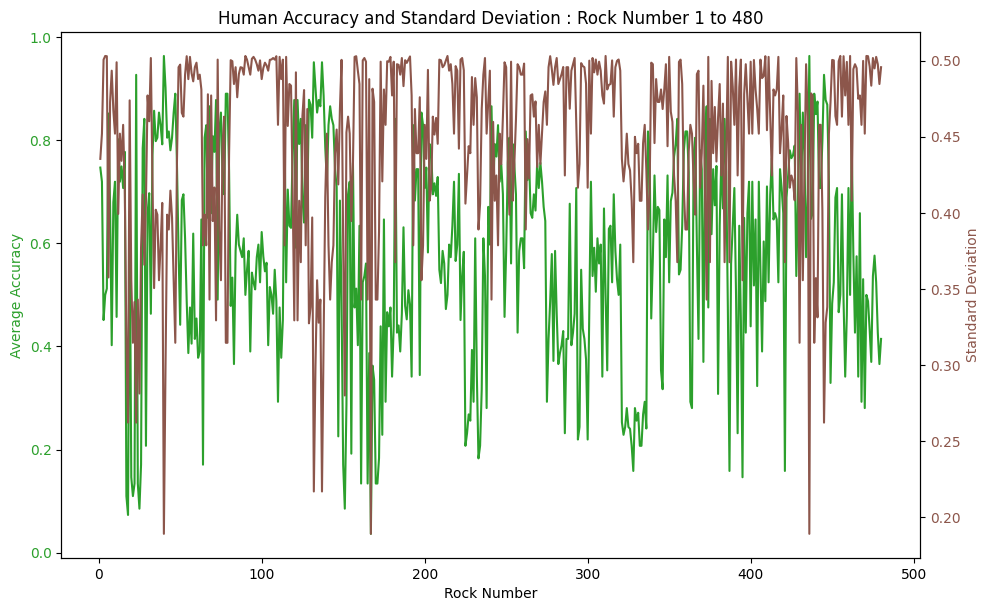

In [27]:
trialRock_df = pd.read_csv("/content/drive/MyDrive/trialData.csv")

# Define a mapping from rock categories to numbers
catToNum = {'Igneous': 1, 'Metamorphic': 2, 'Sedimentary': 3}

# Select relevant columns from the DataFrame
trialRock_df = trialRock_df[['rocknumber', 'category', 'cat_correct']]

# Rename columns for better readability
trialRock_df.columns = ['RockNumber', 'RockCategory', 'CorrectResponse']

# Map rock categories to numerical values
trialRock_df['humanPrediction'] = trialRock_df['RockCategory'].map(catToNum)

# Filter rocks with numbers 1 to 480
filteredRock_df = trialRock_df[trialRock_df['RockNumber'].between(1, 480)]

# Calculate overall human accuracy
overallAccuracy = filteredRock_df['CorrectResponse'].mean()

# Display overall human accuracy
print("Overall Human Accuracy:", overallAccuracy)

# Calculate average human accuracy and standard deviation for each of the 480 rocks
accuracyByRock = filteredRock_df.groupby('RockNumber')['CorrectResponse'].agg(['mean', 'std'])

# Plotting
figu, axx1 = plt.subplots(figsize=(10, 6))

# Plot average accuracy on the left y-axis
color_avg_accuracy = 'tab:green'
axx1.set_xlabel('Rock Number')
axx1.set_ylabel('Average Accuracy', color=color_avg_accuracy)
axx1.plot(accuracyByRock.index, accuracyByRock['mean'], color=color_avg_accuracy)
axx1.tick_params(axis='y', labelcolor=color_avg_accuracy)

# Instantiate a second axes that shares the same x-axis
axx2 = axx1.twinx()

# Plot standard deviation on the right y-axis
color_std_deviation = 'tab:brown'
axx2.set_ylabel('Standard Deviation', color=color_std_deviation)
axx2.plot(accuracyByRock.index, accuracyByRock['std'], color=color_std_deviation)
axx2.tick_params(axis='y', labelcolor=color_std_deviation)

# Tight layout to use the space effectively
figu.tight_layout()

# Set plot title
plt.title('Human Accuracy and Standard Deviation : Rock Number 1 to 480')

# Display the plot
plt.show()

When assessed individually, classifiers such as Logistic Regression and Random Forest demonstrate satisfactory performance, with Logistic Regression achieving the highest accuracy. However, the SVM classifier exhibits comparatively lower accuracy relative to the other classifiers.

Comparing the accuracies, we can observe that the Ensemble model outperforms human accuracy, as it has a higher validation accuracy of 0.722 compared to the human accuracy of 0.578. Therefore, in this specific scenario, the model is better than a human in terms of accuracy.

Further improvements could include:

- Experiment with advanced methods like gradient boosting, stacking, or bagging for improved performance.
- Leverage pre-trained models or features from related tasks to enhance performance, especially with limited labeled data.
- Explore regularization techniques such as L1/L2 regularization, dropout, or batch normalization to prevent overfitting.
- Conduct thorough analysis to understand model errors and adjust models or feature engineering accordingly.
- Explore additional techniques such as interaction terms, polynomial features, or domain-specific transformations.

Group assignment done by:

- Varsha Karanam
- Veda Charitha Bellam
- Pradyumna Kaputhimmareddy

Referenced:

[1] Geron, A.(2019). Hands-on Machine Learning with Scikit-learn, Keras, and Tensorflow: Concepts, tools and techniques to build intelligent systems(2nd ed.).O'Reilly Media.

[2] ChatGPT. https://chat.openai.com/

[3] API Reference (n.d.). Scikit-learn. https://scikit-learn.org/stable/

[4] Referred the first group project.
